# Final Project 1 Linear Regresion

Nama Anggota Kelompok :
1. Dwi Ratna
2. Rara Dita Purnama Reta
3. Muhammad Daffa Izzuddin

## **Latar Belakang**

Uber dan Lyft adalah layanan transportasi online yang memungkinkan pengguna menyewa kendaraan dengan pengemudi melalui situs web atau aplikasi seluler. Uber adalah perusahaan global yang tersedia di 69 negara dan sekitar 900 kota di seluruh dunia. Lyft, di sisi lain, hanya beroperasi di sekitar 644 kota di AS dan 12 kota di Kanada. Namun, di AS, ini adalah perusahaan ridesharing terbesar kedua dengan pangsa pasar 31%.


Kami tertarik dengan dataset Uber dan Lyft. Dari data yang tersimpan, dapat memunculkan prediksi ke depannya. Data-data histori pemesanan taksi online, dapat dimanfaatkan untuk mencatat tarif berdasarkan faktor-faktor pengaruhnya.

Kumpulan data yang digunakan dalam artikel ini telah diimpor dari : Kaggle
Data telah dikumpulkan dari berbagai sumber, termasuk pengumpulan data real-time menggunakan kueri Uber dan Lyft API (Application Programming Interface). Dengan Jumlah data 693071 baris dan 57 kolom, Atribut yang menjadi target yaitu atribut Price/Tarif, sedangkan atribut lainnya merupakan prediktor. 

Objective yang ingin dicapai dalam analisis ini yaitu:

1. Dapat mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi tarif harga Taksi Online

2. Mengimplementasi metode regresi linier dalamt memprediksi tarif harga Taksi Online berdasarkan faktor-faktor yang mempengaruhinya.

### **Import Libraries**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime
import calendar
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_regression
import pickle

print('Librari siap digunakan!')

Librari siap digunakan!


### **Data Loading**

Unggah Data, Melihat ukuran data, Melihat isi data teratas 

In [2]:
df = pd.read_csv ("data/rideshare_kaggle.csv")
print("Dataset berisi {} baris dan {} kolom (atribut)".format(df.shape[0], df.shape[1]))
df.head()

Dataset berisi 693071 baris dan 57 kolom (atribut)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Melihat 5 baris data terbawah

In [3]:
df.tail(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Melihat informasi kolom, baris, dan data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari tahap melihat informasi kolom, baris, dan data type terdapat atribut yang memiliki kesamaan atau dapat diwakilkan dengan atribut yang lain, dataset memiliki baris yang banyak yaitu 693071 baris.

Menampilkan rincian nama kolom 

In [5]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

Mengecek missing value dengan [.isnull()]() serta menjumlahkannya dengan menambah [.sum]()

In [6]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Terdapat 55095 nilai yang kosong pada atribut 'Price'.

Mengecek statistik deskriptif dari masing-masing atribut yang bertipe numeric.

In [7]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Mengecek statistik deskriptif dari masing-masing atribut yang bertipe object

In [8]:
df.describe(include='O')

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


Melihat banyaknya unique values untuk tiap atribut.

In [9]:
for col in df.columns:
    print(col,': ', df[col].nunique())

id :  693071
timestamp :  36179
hour :  24
day :  17
month :  2
datetime :  31350
timezone :  1
source :  12
destination :  12
cab_type :  2
product_id :  13
name :  13
price :  147
distance :  549
surge_multiplier :  7
latitude :  11
longitude :  12
temperature :  308
apparentTemperature :  319
short_summary :  9
long_summary :  11
precipIntensity :  63
precipProbability :  29
humidity :  51
windSpeed :  291
windGust :  286
windGustTime :  25
visibility :  227
temperatureHigh :  129
temperatureHighTime :  23
temperatureLow :  133
temperatureLowTime :  31
apparentTemperatureHigh :  124
apparentTemperatureHighTime :  27
apparentTemperatureLow :  136
apparentTemperatureLowTime :  32
icon :  7
dewPoint :  313
pressure :  316
windBearing :  195
cloudCover :  83
uvIndex :  3
visibility.1 :  227
ozone :  274
sunriseTime :  110
sunsetTime :  114
moonPhase :  18
precipIntensityMax :  65
uvIndexTime :  20
temperatureMin :  131
temperatureMinTime :  25
temperatureMax :  128
temperatureMaxTime : 

Melihat unique value untuk atribut 'cab_type'

In [10]:
df['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

## **Data Cleaning**

### Cek duplikasi data

Mengecek missing value pada atribut Price

In [11]:
df['price'].isnull().sum()

55095

Terdapat 55095 baris yang merupakan missing value.
Perlu dilakukan penanganan terhadap missing value ini.

Cek banyak persen dari missing value pada atribut Price

In [12]:
print(df['price'].isnull().sum()/df.shape[0] * 100, '%')

7.949402009317949 %


Terdapat 7.9% merupakan missing values dari keseluruhan dataset pada atribut Price

Selanjutnya penanganan missing values dengan menghapus baris yang merupakan missing value menggunakan .drop

In [13]:
df2 = df.drop(df[df['price'].isnull()].index)

Membandingkan ukuran matriks dataset sebelum dan sesudah dilakukan penanganan missing values.

In [14]:
df.shape, df2.shape

((693071, 57), (637976, 57))

Cek missing value, untuk memastikan bahwa tidak ada lagi missing value

In [15]:
df2.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Melakukan crosstab pada atribut product_id dan name.

In [16]:
pd.crosstab(df.product_id, df.name)

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,Taxi,UberPool,UberX,UberXL,WAV
product_id,,,,,,,,,,,,,
55c66225-fbe7-4fd5-9072-eab1ece5e23e,0,0,0,0,0,0,0,0,0,0,55094,0,0
6c84fd89-3f11-4782-9b50-97c468b19529,55095,0,0,0,0,0,0,0,0,0,0,0,0
6d318bcc-22a3-4af6-bddd-b409bfce1546,0,55096,0,0,0,0,0,0,0,0,0,0,0
6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0,0,0,0,0,0,0,0,0,0,0,55096,0
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,0,0,0,0,0,0,0,0,55095,0,0,0,0
997acbb5-e102-41e1-b155-9df7de0a73f2,0,0,0,0,0,0,0,0,0,55091,0,0,0
9a0e7b09-b92b-4c41-9779-2ad22b4d779d,0,0,0,0,0,0,0,0,0,0,0,0,55096
lyft,0,0,0,0,0,51235,0,0,0,0,0,0,0
lyft_line,0,0,0,0,0,0,0,51233,0,0,0,0,0


Diperoleh hasil bahwa kedua atribut tersebut sama, sehingga akan dilakukan penghapusan atribut product_id.

Melakukan inisiasi atribut yang akan dihapus.

In [17]:
remove1_cols = ["id", "timestamp", "timezone", "product_id", "latitude", "longitude"]

remove2_cols = ["precipIntensity", "precipProbability", "windGustTime", "temperatureHigh", "temperatureHighTime", "temperatureLow", 
                "temperatureLowTime", "apparentTemperatureHigh", "apparentTemperatureHighTime", "apparentTemperatureLow", 
                "apparentTemperatureLowTime", "icon", "dewPoint", "windBearing", "uvIndex", "visibility.1", "ozone", "sunriseTime", 
                "sunsetTime", "uvIndexTime", "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime", 
                "apparentTemperatureMin", "apparentTemperatureMinTime", "apparentTemperatureMax", "apparentTemperatureMaxTime", 
                "apparentTemperature"]

Melakukan penghapusan atribut

In [18]:
df3 = df2.drop(remove1_cols, axis=1)

df3 = df3.drop(remove2_cols, axis=1)

Melihat isi data teratas dari dataset terbaru

In [19]:
df3.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,...,short_summary,long_summary,humidity,windSpeed,windGust,visibility,pressure,cloudCover,moonPhase,precipIntensityMax
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001


Memberikan nama baru untuk setiap atribut.

In [20]:
df3 = df3.rename(columns={'hour':'Jam', 'day':'Hari','month':'Bulan', 'source':'Asal', 'destination': 'Tujuan','cab_type':'Merek',
                        'name':'Produk','price':'Tarif','distance':'Jarak', 'temperature':'Suhu','humidity':'Kelembapan','short_summary':'Cuaca',
                        'pressure':'Tekanan', 'datetime':'Tanggal','long_summary':'Keterangan', 'surge_multiplier':'Surge_multiplier','windSpeed':'Kecepatan_angin', 'windGust':'Hembusan_angin','cloudCover':'Tutupan_awan', 
                        'visibility':'Visibilitas', 'moonPhase':'Fase_bulan','precipIntensityMax':'Intensitas_maks'})

In [21]:
df3.head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,...,Cuaca,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001


Memberikan nama baru untuk nilai dalam atribut Produk

In [22]:
df3.loc[df3['Produk'] == 'Taxi', 'Produk'] = 'Uber Taxi'
df3.loc[df3['Produk'] == 'Shared', 'Produk'] = 'Lyft Shared'
df3.loc[df3['Produk'] == 'Lux', 'Produk'] = 'Lyft Lux'
df3.loc[df3['Produk'] == 'Lyft', 'Produk'] = 'Lyft Regular'
df3.loc[df3['Produk'] == 'Black SUV', 'Produk'] = 'Uber Black SUV'
df3.loc[df3['Produk'] == 'WAV', 'Produk'] = 'Uber WAV'
df3.loc[df3['Produk'] == 'Black', 'Produk'] = 'Uber Black'

In [23]:
df3.head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,...,Cuaca,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,...,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,...,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,...,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001


Melihat banyaknya nilai dari masing-masing atribut

In [24]:
for col in df3.columns:
    print(col,': ')
    print(df3[col].value_counts())
    print("  ")
    print("  ")

Jam : 
0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: Jam, dtype: int64
  
  
Hari : 
27    70135
28    67842
29    55222
1     41680
30    41544
16    41359
17    41354
14    41344
15    41332
3     41323
2     41298
13    35496
18    33329
26    29028
4     11627
10     2534
9      1529
Name: Hari, dtype: int64
  
  
Bulan : 
12    374205
11    263771
Name: Bulan, dtype: int64
  
  
Tanggal : 
2018-11-26 23:33:14    151
2018-11-29 02:29:08    149
2018-11-29 02:47:08    146
2018-11-27 00:03:14    146
2018-11-29 04:38:08    146
                      ... 
2018-12-03 07:33:03      3
2018-11-30 21:33:07      3
2018-12-15 06:05:07      3
2018-12-13 15:10:13      1
2018-11-30 13:17:58      1
Name: Tanggal, Length: 31350, dtype: int64
  
  
Asal : 


Membuat atribut baru yakni Tarif_per_mile dimana diperoleh dari perhitungan Tarif dibagi Jarak

In [25]:
df4 = df3.copy()

df4["Tarif_per_mile"] = df4["Tarif"] / df4["Jarak"]

In [26]:
df4.head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,...,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,...,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,...,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,...,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545


Membuat atribut baru yaitu Weekname mengekstrak hari dari atribut Tanggal

In [27]:
df4['Tanggal'] = df4['Tanggal'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
df4['Weekname'] = df4['Tanggal'].apply(lambda x: calendar.day_name[x.weekday()])

In [28]:
df4.head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,...,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile,Weekname
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,...,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636,Sunday
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,...,0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000,Tuesday
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,...,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091,Wednesday
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909,Friday
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545,Thursday


### Menghapus atribut Tanggal, karena dapat diwakilkan oleh atribut Hari, Bulan, dan Weekname

In [29]:
df4 = df4.drop(["Tanggal"], axis=1)

In [30]:
df4.head()

,Jam,Hari,Bulan,Asal,Tujuan,Merek,Produk,Tarif,Jarak,Surge_multiplier,...,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile,Weekname
0,9,16,12,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,1.0,...,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636,Sunday
1,2,27,11,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,1.0,...,0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000,Tuesday
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,1.0,...,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091,Wednesday
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,...,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909,Friday
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,...,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545,Thursday


Membuat atribut baru yakni Rute dengan menggabungkan atribut Asal dan Tujuan

In [31]:
df4["Rute"] = df4["Asal"] + "-" + df4['Tujuan']
df4["Rute"]

0         Haymarket Square-North Station
1         Haymarket Square-North Station
2         Haymarket Square-North Station
3         Haymarket Square-North Station
4         Haymarket Square-North Station
                       ...              
693065                West End-North End
693066                West End-North End
693067                West End-North End
693069                West End-North End
693070                West End-North End
Name: Rute, Length: 637976, dtype: object

In [32]:
df4.head()

,Jam,Hari,Bulan,Asal,Tujuan,Merek,Produk,Tarif,Jarak,Surge_multiplier,...,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile,Weekname,Rute
0,9,16,12,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,1.0,...,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636,Sunday,Haymarket Square-North Station
1,2,27,11,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,1.0,...,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000,Tuesday,Haymarket Square-North Station
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,1.0,...,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091,Wednesday,Haymarket Square-North Station
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,...,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909,Friday,Haymarket Square-North Station
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,...,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545,Thursday,Haymarket Square-North Station


# **Exploratory Data Analysis**

## Descriptive Statistics & Query

Melihat statistik descriptif pada data numerik

In [33]:
df4.describe()

,Jam,Hari,Bulan,Tarif,Jarak,Surge_multiplier,Suhu,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,11.618528,17.797674,11.586550,16.545125,2.189261,1.015068,39.582406,0.741056,6.186795,8.470616,8.469180,1010.092744,0.686291,0.579076,0.037369,9.687674
std,6.948776,9.982083,0.492452,9.324359,1.135413,0.095422,6.725500,0.138575,3.147856,5.288683,2.601828,13.475580,0.358599,0.244674,0.055216,13.705589
min,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,18.910000,0.380000,0.450000,0.800000,0.717000,988.090000,0.000000,0.090000,0.000000,0.556586
25%,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,36.450000,0.640000,3.410000,4.060000,8.432000,999.820000,0.370000,0.300000,0.000000,4.661017
50%,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,40.490000,0.710000,5.910000,7.550000,9.880000,1009.250000,0.820000,0.680000,0.000400,7.492326
75%,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,43.580000,0.880000,8.410000,11.740000,9.996000,1021.860000,1.000000,0.790000,0.091600,11.538462
max,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,57.220000,0.960000,15.000000,27.250000,10.000000,1035.550000,1.000000,0.930000,0.145900,1375.000000


Hasil dari tahap diatas :

- Jarak terjauh 7.86 miles dengan tarif max 97.5 dollar
- Suhu rata-rata berada pada 39.58derajat Fahrenheit
- Rata-rata pemesanan Taksi Online berada pada jam 11

Melihat statistik descriptif pada data kategorik

In [34]:
df4.describe(include='O')

,Asal,Tujuan,Merek,Produk,Cuaca,Keterangan,Weekname,Rute
count,637976,637976,637976,637976,637976,637976,637976,637976
unique,12,12,2,12,9,11,7,72
top,Financial District,Financial District,Uber,UberXL,Overcast,Mostly cloudy throughout the day.,Tuesday,Financial District-South Station
freq,54197,54192,330568,55096,201429,186262,115091,9534


Dari  tahap di atas diperoleh:

- Terdapat 12 tempat asal dan tujuan
- Terdapat 2 merek taksi online pada dataset ini, yakni Uber dan Lyft
- Cuaca yang paling sering muncul yakni Overcast
- Hari dengan paling banyak pemesanan taksi online yakni Tuesday
- Rute paling banyak dipesan yakni Financial District-South Station

Grouping pada atribut Merek dan Tarif untuk melihat rata-ratanya

In [35]:
mean1 = df4[['Merek','Tarif']].groupby('Merek').mean().sort_values(by='Tarif', ascending=True)
mean1

,Tarif
Merek,
Uber,15.795343
Lyft,17.351396


Uber memiliki Tarif rata-rata yakni 15.79 dollars, sedangkan Lyft yaitu 17.35 dollars

Melakukan crosstab pada atribut Merek dan Produk untuk melihat proporsi dataset

In [36]:
pd.crosstab(df4.Merek, df4.Produk)

Produk,Lux Black,Lux Black XL,Lyft Lux,Lyft Regular,Lyft Shared,Lyft XL,Uber Black,Uber Black SUV,Uber WAV,UberPool,UberX,UberXL
Merek,,,,,,,,,,,,
Lyft,51235,51235,51235,51235,51233,51235,0,0,0,0,0,0
Uber,0,0,0,0,0,0,55095,55096,55096,55091,55094,55096


Dataset sudah diklasifikasikan dengan benar, yakni Produk dengan Merek yang sesuai, juga untuk proporsi data tidak memiliki perbedaan yang signifikan atau relatif sama.

Melakukan crosstab pada atribut Merek dan Tujuan

In [37]:
pd.crosstab(df4.Merek, df4.Tujuan)

Tujuan,Back Bay,Beacon Hill,Boston University,Fenway,Financial District,Haymarket Square,North End,North Station,Northeastern University,South Station,Theatre District,West End
Merek,,,,,,,,,,,,
Lyft,25650,25464,25614,25620,26238,25613,25614,25326,25619,25620,25536,25494
Uber,27540,27376,27557,27546,27954,27558,27550,27251,27546,27539,27653,27498


Pada semua Tujuan, Merek Uber memiliki proporsi data yang lebih tinggi dari pada Merek Lyft.

##  Boxplot

Melakukan visualisasi Boxplot untuk melihat distribusi data, outlier data

Text(0.5, 1.0, 'Tarif vs Merek')

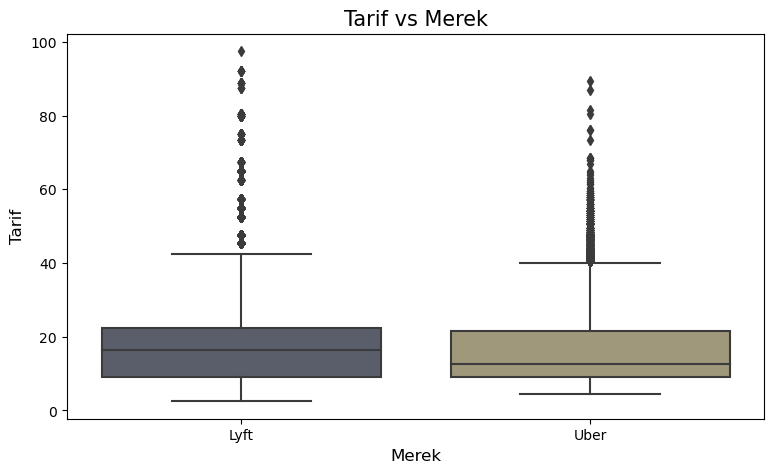

In [38]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='Merek', y='Tarif', data=df4, palette="cividis")

plt.xlabel("Merek", fontsize= 12)
plt.ylabel("Tarif", fontsize= 12)
plt.title("Tarif vs Merek", fontsize= 15)

Pada Boxplot Lyft dan Uber saling memiliki outlier yang cukup banyak, distribusi data tidak jauh berbeda.

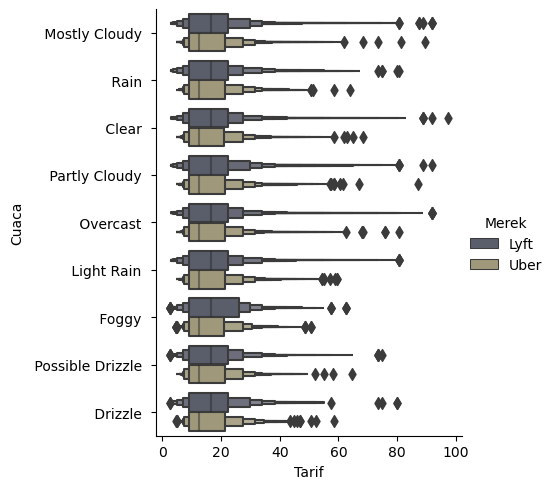

In [39]:
sns.catplot(x="Tarif", y="Cuaca", hue="Merek", kind="boxen", 
            data=df4, palette='cividis')

Distribusi Cuaca terhadap Tarif tidak terlalu berbeda signifikan, serta memiliki banyak outlier.

Text(0.5, 1.0, 'Jarak vs Merek')

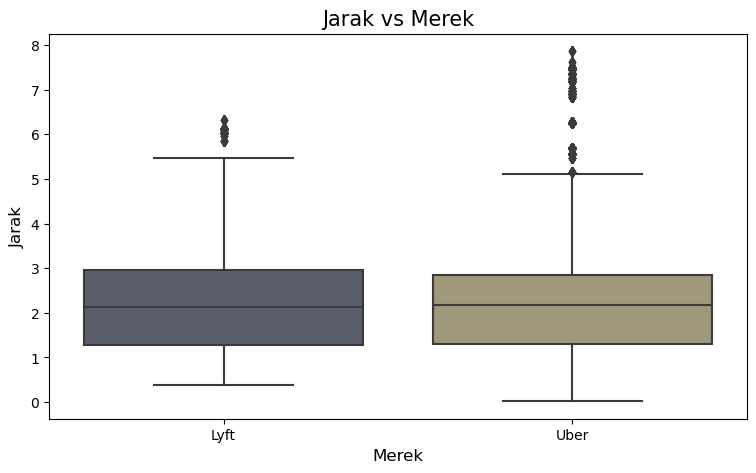

In [40]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='Merek', y='Jarak', data=df4, palette="cividis")

plt.xlabel("Merek", fontsize= 12)
plt.ylabel("Jarak", fontsize= 12)
plt.title("Jarak vs Merek", fontsize= 15)


Uber memiliki jangkauan jarak yang cukup jauh dengan Lyft serta outlier Uber juga lebih banyak dari Lyft.

## Histogram
Melakukan visualisasi histogram untuk melihat proporsi data.

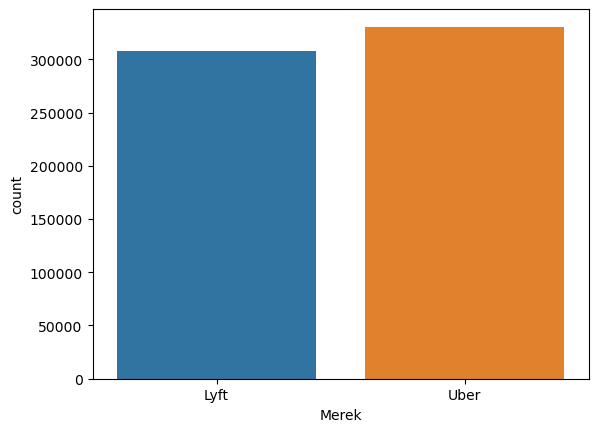

In [41]:
sns.countplot(x="Merek", data=df4)
plt.show()

Proporsi data antara Merek Lyft dan Uber tidak berbeda signifikan.

## Correlation Matrix
Melakukan visualisasi korelasi antar variabel untuk melihat hubungan.

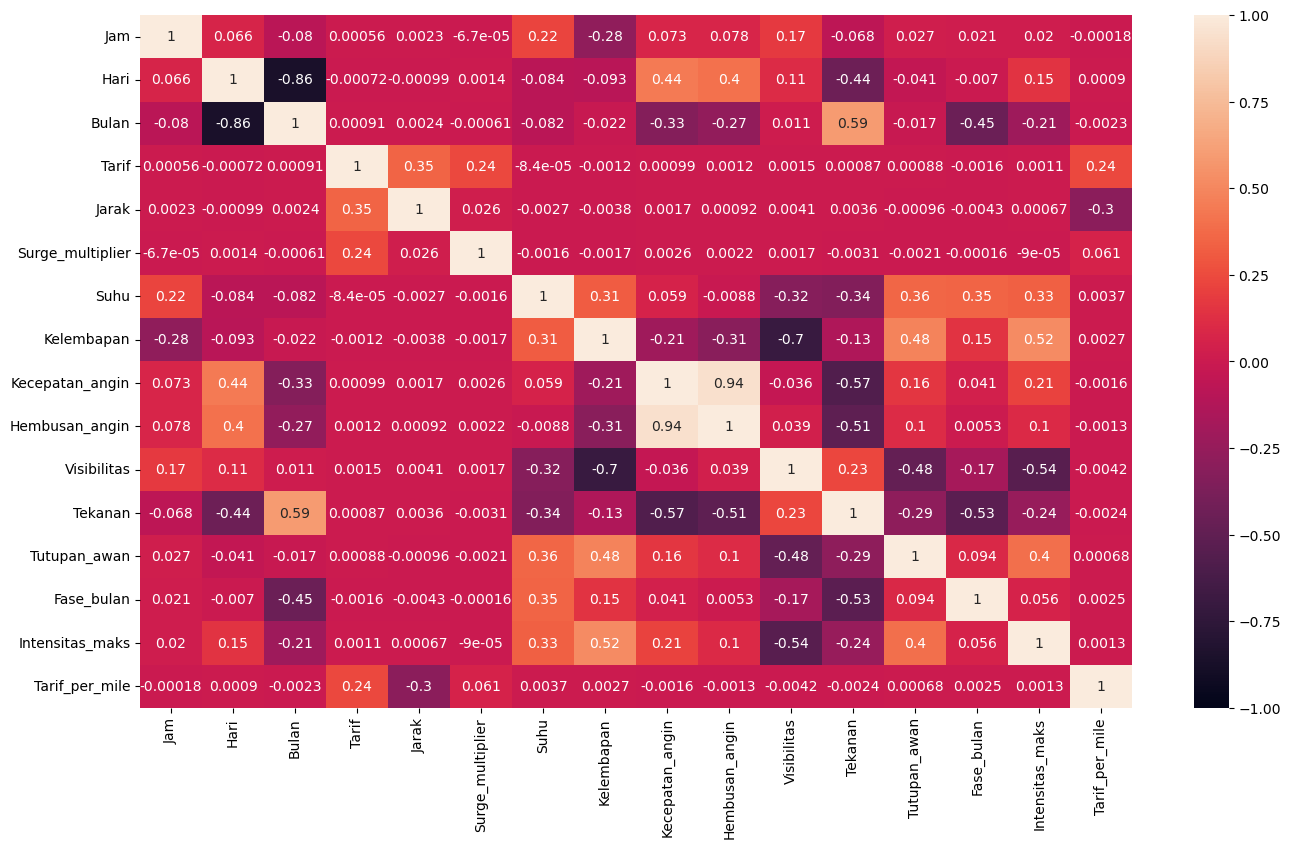

In [42]:
plt.figure(figsize=(16, 9))
sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

Dari tahapan di atas diperoleh:

- Atribut hari, suhu, kelembapan, fase bulan memiliki korelasi negatif dengan Tarif.
- Atribut selain yang disebutkan di atas memiliki korelasi positif terhadap Tarif.
- Korelasi paling tinggi yakni tarif dengan jarak, diikuti oleh tarif dengan surge multiplier.

## **Data Preprocessing**
Melakukan inisiasi variabel X dan Y

In [43]:
X = df4.drop(['Tarif', 'Tarif_per_mile'], axis=1)
y = df4['Tarif']
print(X.shape)
print(y.shape)

(637976, 22)
(637976,)


### Encode

Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object

In [44]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
    
encoding_pipeline = Pipeline([
    ('encoding',MultiColumnLabelEncoder(columns=["Asal", "Tujuan", "Merek", "Produk", "Cuaca", "Keterangan",
                                                 "Weekname", "Rute"]))
])
df5 = encoding_pipeline.fit_transform(df4)

Melihat isi data teratas

In [45]:
df5.head()

,Jam,Hari,Bulan,Asal,Tujuan,Merek,Produk,Tarif,Jarak,Surge_multiplier,...,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile,Weekname,Rute
0,9,16,12,5,7,0,4,5.0,0.44,1.0,...,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636,3,33
1,2,27,11,5,7,0,2,11.0,0.44,1.0,...,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000,5,33
2,1,28,11,5,7,0,3,7.0,0.44,1.0,...,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091,6,33
3,4,30,11,5,7,0,1,26.0,0.44,1.0,...,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909,0,33
4,3,29,11,5,7,0,5,9.0,0.44,1.0,...,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545,4,33


Melakukan inisiasi variabel X dan Y sesudah dilakukan encode

In [46]:
X_transform = df5.drop(['Tarif', 'Tarif_per_mile'], axis=1)
y = df4['Tarif']
print(X.shape)
print(y.shape)

(637976, 22)
(637976,)


### Feature Selection

Melakukan feature selection menggunakan library SequentialFeatureSelector dengan Metode linear
regression, banyak atribut 10, metode forward, evaluasi dengan R squared, dan cv dengan k=3.

In [47]:
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2', 
          cv = 3)

sfs.fit(X_transform, y)
sfs.k_feature_names_

('Hari',
 'Asal',
 'Tujuan',
 'Merek',
 'Produk',
 'Jarak',
 'Surge_multiplier',
 'Tekanan',
 'Intensitas_maks',
 'Rute')

Diperoleh hasil dengan 10 feature atau atribut yang paling berpengaruh dalam model.

Melakukan feature selection menggunakan library F regression dengan k=10

In [48]:
X_transform = df5.drop(['Tarif', 'Tarif_per_mile'], axis=1)

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X_transform,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_transform.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print("best 10 features are")
print(featureScores.nlargest(10,'Score'))

best 10 features are
               Specs         Score
6             Produk  86751.323338
7              Jarak  86228.749811
8   Surge_multiplier  39151.469570
5              Merek   4466.959446
4             Tujuan   1371.722040
21              Rute    582.615651
3               Asal    410.760893
20          Weekname      5.225958
18        Fase_bulan      1.637163
15       Visibilitas      1.428760


Hasil yang didapatkan feature atau atribut yang paling berpengaruh pada model.

Memilih 8 atribut yang paling berpengaruh signifikan berdasarkan kedua uji feature selection yang telah dilakukan, yakni atribut produk, jarak, surge_multiplier, merek, tujuan, asal, Weekname, dan visibilitas.

In [49]:
X_fit = df5[['Produk', 'Jarak', 'Surge_multiplier', 'Merek', 'Tujuan', 'Asal',
            'Weekname', 'Visibilitas']]

Melihat isi data teratas dari dataframe X_fit

In [50]:
X_fit.head()

,Produk,Jarak,Surge_multiplier,Merek,Tujuan,Asal,Weekname,Visibilitas
0,4,0.44,1.0,0,7,5,3,10.000
1,2,0.44,1.0,0,7,5,5,4.786
2,3,0.44,1.0,0,7,5,6,10.000
3,1,0.44,1.0,0,7,5,0,10.000
4,5,0.44,1.0,0,7,5,4,10.000


Melihat rincian dataframe X_fit

In [51]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Produk            637976 non-null  int32  
 1   Jarak             637976 non-null  float64
 2   Surge_multiplier  637976 non-null  float64
 3   Merek             637976 non-null  int32  
 4   Tujuan            637976 non-null  int32  
 5   Asal              637976 non-null  int32  
 6   Weekname          637976 non-null  int32  
 7   Visibilitas       637976 non-null  float64
dtypes: float64(3), int32(5)
memory usage: 31.6 MB


Melihat dimensi X_fit

In [52]:
X_fit.shape

(637976, 8)

Setelah diperoleh atribut yang akan dilakukan training, Selanjutnya membagi data menjadi Training dan Testing dengan proporsi 0.8 dan 0.2

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X_fit, y, test_size=0.20, random_state=325)

## **Model Defining**

Metode pengujian pada training ini menggunakan metode linear regression dengan pembanding random forest regressor. 
Linear regression adalah teknik yang sederhana dan mudah diinterpretasikan, yang cocok untuk data yang memiliki hubungan linier antara variabel independen dan variabel dependen. Metode ini digunakan untuk memprediksi nilai variabel dependen berdasarkan nilai variabel independen dengan memperhitungkan hubungan linear antara keduanya.
Di sisi lain, random forest regressor adalah teknik yang lebih kompleks yang memanfaatkan sejumlah besar pohon keputusan untuk memprediksi nilai variabel dependen. Teknik ini cocok untuk data yang kompleks dan memiliki banyak variabel independen yang saling berinteraksi, serta dapat mengatasi masalah overfitting.

Alasan penggunaan metode ini yaitu tipe data prediksi yang berupa continuous data, sehingga metode tersebut cocok digunakan.

Model linear regression dengan menghilangkan nilai intercept. Penghilangan intercept dapat membantu dalam mengurangi heteroskedastisitas dan meningkatkan akurasi prediksi. Penghilangan intercept dikarenakan tarif tidak bisa berdiri sendiri tanpa adanya faktor yang mempengaruhinya. Jika tidak ada faktor atau dapat dikatakan tidak ada histori X maka tarif bernilai 0.

In [54]:
lr1 = LinearRegression(fit_intercept=False) 

Model kedua yakni model linear regression dengan melakukan normalisasi data menggunakan mean. Tujuan dari normalisasi adalah untuk mengubah skala data sehingga seluruh variabel independen memiliki rentang nilai yang serupa. Dalam model regresi linear, normalisasi dapat membantu meningkatkan akurasi model dan mengurangi pengaruh outlier. Setelah data dinormalisasi, langkah selanjutnya adalah membangun model regresi linear. Model ini akan memprediksi nilai variabel dependen berdasarkan nilai-nilai variabel independen yang telah dinormalisasi.

In [55]:
lr2 = make_pipeline(StandardScaler(with_mean=True), LinearRegression())

Variabel pada algoritma pembanding yang digunakan yaitu model Random Forest Regressor. Guna meningkatkan
akurasi dalam metode random forest, digunakan hyperparameter diantaranya n_estimators sejumlah 50, dikarenakan dataset ini memiliki baris yang sangat banyak sehingga cabang tree yang digunakan dapat diperkecil.

In [56]:
regr = RandomForestRegressor(n_estimators = 50, random_state = 13)

## **Model Training**

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [57]:
lm_model1 = lr1.fit(X_train, y_train)

In [58]:
lm_model2 = lr2.fit(X_train, y_train)

In [59]:
regr_model = regr.fit(X_train, y_train)

## **Model Evaluation**

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih.

Linear Regression train R squared: 0.4733
Linear Regression test R squared: 0.4748
Linear Regression test RMSE: 6.7659


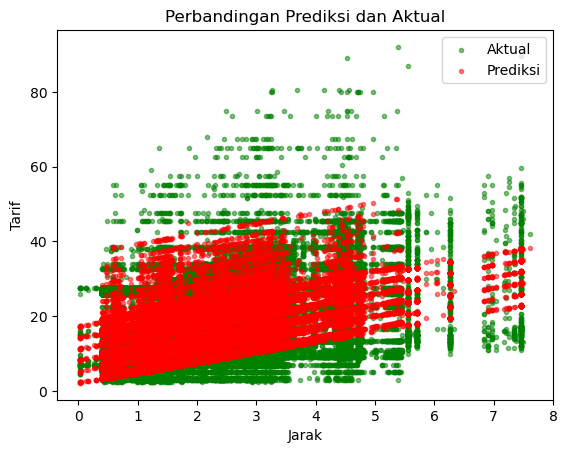

In [60]:
y_pred = lm_model1.predict(X_test)
lr_train_r2 = lr1.score(X_train, y_train)
lr_test_r2 = lr1.score(X_test, y_test)
print('Linear Regression train R squared: %.4f' % lr_train_r2)
print('Linear Regression test R squared: %.4f' % lr_test_r2)

lr_mse = mean_squared_error(y_pred, y_test)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression test RMSE: %.4f' % lr_rmse)

x_axis = X_test.Jarak 

plt.scatter(x_axis, y_test, c = 'g', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak')
plt.ylabel('Tarif') 
plt.title("Perbandingan Prediksi dan Aktual")
plt.legend(loc = 'upper right')
plt.show()

Linear Regression train R squared: 0.4739
Linear Regression test R squared: 0.4754
Linear Regression test RMSE: 6.7621


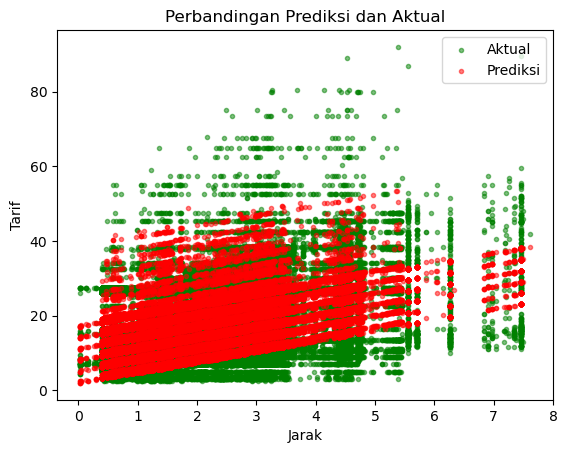

In [61]:
y_pred = lm_model2.predict(X_test)
lr_train_r2 = lr2.score(X_train, y_train)
lr_test_r2 = lr2.score(X_test, y_test)
print('Linear Regression train R squared: %.4f' % lr_train_r2)
print('Linear Regression test R squared: %.4f' % lr_test_r2)

lr_mse = mean_squared_error(y_pred, y_test)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression test RMSE: %.4f' % lr_rmse)

x_axis = X_test.Jarak 

plt.scatter(x_axis, y_test, c = 'g', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak')
plt.ylabel('Tarif') 
plt.title("Perbandingan Prediksi dan Aktual")
plt.legend(loc = 'upper right')

plt.show()

Random Forest train R squared is: 0.9874
Random Forest test R squared": 0.9626
Random Forest RMSE: 1.8044


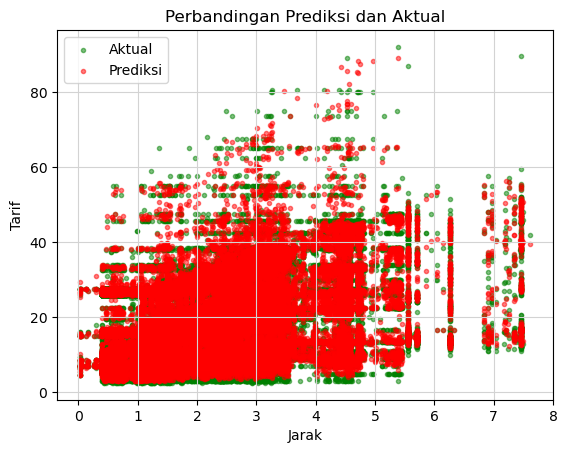

In [62]:
predictions = regr.predict(X_test)
l_rf_train_r2 = regr.score(X_train,y_train)
l_rf_test_r2 = regr.score(X_test, y_test)
print('Random Forest train R squared is: %.4f' % l_rf_train_r2)
print('Random Forest test R squared": %.4f' % l_rf_test_r2)

l_forest_mse = mean_squared_error(predictions, y_test)
l_forest_rmse = np.sqrt(l_forest_mse)
print('Random Forest RMSE: %.4f' % l_forest_rmse)

x_axis = X_test.Jarak

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'g', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak')
plt.ylabel('Tarif') 
plt.title("Perbandingan Prediksi dan Aktual")
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'upper left')
plt.show()

Dari Tahapan di atas diperoleh:

- Model kedua memiliki nilai evaluasi model yang lebih baik dibandingkan model pertama.
- Data yang dilakukan normalisasi memiliki evaluasi model lebih baik daripada yang tidak dilakukan normalisasi.
- Model ketiga yaitu model pembanding, memiliki evaluasi paling baik diantara model yang lain.
- Model akhir yang digunakan dalam analisis ini untuk selanjutnya diterapkan dalam deployment adalah model kedua, dikarenakan tujuan analisis ini membuat model prediksi menggunakan metode regresi linier.
- Model ketiga dapat digunakan menjadi alternatif lain di luar analisis ini.

## **Model Inference**

Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

In [63]:
X_new = {'Produk':[1,2,3], 'Jarak':[1,2,3], 'Surge_multiplier':[1.25,2,3], 'Merek':[0,1,0], 'Tujuan':[1,2,3], 
         'Asal':[1,2,3],'Weekname':[1,2,3], 'Visibilitas':[1,2,3]}
X_new = pd.DataFrame(X_new)

Melakukan prediksi pada data baru

In [64]:
y_pred1 = lm_model2.predict(X_new)
print('Prediksi Tarif yaitu: ')
print(y_pred1)

Prediksi Tarif yaitu: 
[22.72538284 54.90613808 58.19879657]


## **Analysis**



- Berdasarkan dataset diatas, terdapat 56 atribut yang diyakini mempengaruhi tarif taksi online. Setelah dilakukan analisis, diambil 8 atribut/faktor  yang paling mempengaruhi model.
- Faktor yang berpengaruh signifikan terhadap harga taksi online adalah produk, jarak,surge multiplier , merek, tujuan, asal, hari dalam seminggu, tekanan,inttensitas_maks dan Rute.
- Model regresi linier yang paling optimal adalah model regresi kedua yang menormalkan data dengan Train R-squared sebesar 0,4739 dan Test R-Squared sebesar 0,4754, diperoleh Test RMSE sebesar 6,7621.
- Model dan prediksi yang dibuat sudah mendekati angka 0 menunjukkan bahwa model memiliki kecocokan yang hampir sempurna, dan model serta prediksi tersebut sudah baik.